<a href="https://colab.research.google.com/github/Divyascientist/Predictions/blob/main/Cardent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import os

In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# prompt: change the working directory

os.chdir('/content/drive/MyDrive') #Change the path as needed
print(os.getcwd())


/content/drive/MyDrive


In [ ]:
df1 = pd.read_csv('Train/_annotations.csv')
df2 = pd.read_csv('val/_annotations.csv')

In [ ]:
train_dir = '/content/drive/MyDrive/Train'  # e.g., './train'
val_dir = '/content/drive/MyDrive/val'

df1['filepath'] = df1['filename'].apply(lambda x: os.path.join(train_dir,x))
df2['filepath'] = df2['filename'].apply(lambda x: os.path.join(val_dir, x))


df1 = df1[df1['filepath'].apply(os.path.exists)]
df2 = df2[df2['filepath'].apply(os.path.exists)]

In [ ]:
df1.shape

(3120, 9)

In [ ]:
df2.shape

(562, 9)

In [ ]:
train_df= df1[['filepath', 'class']]
val_df = df2[['filepath','class']]

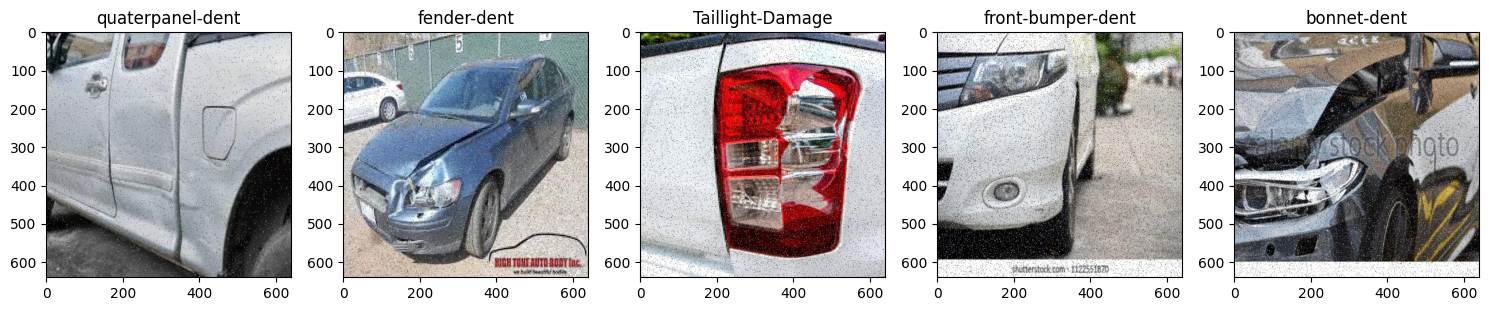

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

N=5
sample_df=train_df.sample(n=N)

plt.figure(figsize=(15,5))

for i,(row) in enumerate(sample_df.iterrows()):
  #print (i, row[1]['filepath'])
  img = mpimg.imread(row[1]['filepath'])
  plt.subplot(1,N,i+1)
  plt.imshow(img)
  plt.title(row[1]['class'])

plt.tight_layout()
plt.show()


In [ ]:
print("Unique Classes in TRAIN:")
print(train_df['class'].unique())

print("Unique Classes in Valdation:")
print(val_df['class'].unique())



Unique Classes in TRAIN:
['roof-dent' 'rear-bumper-dent' 'Headlight-Damage' 'front-bumper-dent'
 'fender-dent' 'quaterpanel-dent' 'Sidemirror-Damage'
 'Rear-windscreen-Damage' 'bonnet-dent' 'doorouter-dent'
 'RunningBoard-Dent' 'Front-Windscreen-Damage' 'Taillight-Damage'
 'pillar-dent' 'Signlight-Damage']
Unique Classes in Valdation:
['front-bumper-dent' 'Headlight-Damage' 'fender-dent' 'RunningBoard-Dent'
 'doorouter-dent' 'bonnet-dent' 'rear-bumper-dent' 'quaterpanel-dent'
 'Front-Windscreen-Damage' 'Taillight-Damage' 'Rear-windscreen-Damage'
 'Sidemirror-Damage' 'roof-dent' 'Signlight-Damage'
 'Major-Rear-Bumper-Dent']


In [ ]:
# Class distribution in train
print(" Class distribution in TRAIN:")
print(train_df['class'].value_counts())

# Class distribution in val
print("\n Class distribution in VALIDATION:")
print(val_df['class'].value_counts())




 Class distribution in TRAIN:
class
front-bumper-dent          511
doorouter-dent             424
bonnet-dent                423
rear-bumper-dent           324
Rear-windscreen-Damage     225
roof-dent                  213
fender-dent                184
Headlight-Damage           175
Sidemirror-Damage          132
RunningBoard-Dent          121
Front-Windscreen-Damage    114
Taillight-Damage            99
quaterpanel-dent            94
Signlight-Damage            48
pillar-dent                 33
Name: count, dtype: int64

 Class distribution in VALIDATION:
class
front-bumper-dent          111
bonnet-dent                 74
doorouter-dent              61
rear-bumper-dent            56
fender-dent                 50
Headlight-Damage            36
quaterpanel-dent            36
Rear-windscreen-Damage      28
Taillight-Damage            26
Front-Windscreen-Damage     23
Sidemirror-Damage           20
RunningBoard-Dent           19
roof-dent                   16
Signlight-Damage            

In [ ]:
# get common class
common_classes=set(train_df['class'].unique()).intersection(set(val_df['class'].unique()))
print("Common Classes:",common_classes)


# Step 2: Filter both dataframes
train_df=train_df[train_df['class'].isin(common_classes)].reset_index(drop=True)
val_df=val_df[val_df['class'].isin(common_classes)].reset_index(drop=True)

# Step 3: Optional - check class distribution again
print("\n Final TRAIN classes:\n", train_df['class'].value_counts())
print("\n Final VAL classes:\n", val_df['class'].value_counts())

Common Classes: {'RunningBoard-Dent', 'bonnet-dent', 'Front-Windscreen-Damage', 'Sidemirror-Damage', 'Headlight-Damage', 'doorouter-dent', 'rear-bumper-dent', 'Signlight-Damage', 'fender-dent', 'front-bumper-dent', 'roof-dent', 'Taillight-Damage', 'Rear-windscreen-Damage', 'quaterpanel-dent'}

 Final TRAIN classes:
 class
front-bumper-dent          511
doorouter-dent             424
bonnet-dent                423
rear-bumper-dent           324
Rear-windscreen-Damage     225
roof-dent                  213
fender-dent                184
Headlight-Damage           175
Sidemirror-Damage          132
RunningBoard-Dent          121
Front-Windscreen-Damage    114
Taillight-Damage            99
quaterpanel-dent            94
Signlight-Damage            48
Name: count, dtype: int64

 Final VAL classes:
 class
front-bumper-dent          111
bonnet-dent                 74
doorouter-dent              61
rear-bumper-dent            56
fender-dent                 50
Headlight-Damage            36
qu

In [ ]:
train_df.shape

(3087, 2)

In [ ]:
val_df.shape

(561, 2)

In [ ]:
import os
from PIL import Image
import pandas as pd

def check_img_pths(df):
  missing_files=[]
  unreadable_files=[]

  for idx,path in enumerate(df['filepath']):
    if not os.path.exists(path):
      missing_files.append(path)
    else:
       try:
        img=Image.open(path)
        img.verify()
       except Exception as e:
        unreadable_files.append(path)

  print(f"Total images: {len(df)}")
  print(f"Missing files: {len(missing_files)}")
  print(f"Unreadable files: {len(unreadable_files)}")
  return missing_files, unreadable_files


In [ ]:
missing_train, unreadable_train = check_img_pths(train_df)


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_labels = train_df['class'].unique()
class_indices = {c: i for i, c in enumerate(class_labels)}
train_df['class_idx'] = train_df['class'].map(class_indices)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['class_idx']),
    y=train_df['class_idx']
)
class_weights_dict = dict(enumerate(class_weights))


In [ ]:
from textwrap import fill
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'



)

val_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='class',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_generator=val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepath',
    y_col='class',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 3087 validated image filenames belonging to 14 classes.
Found 561 validated image filenames belonging to 14 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
num_classes=len(train_generator.class_indices)
print("Number of classes:",num_classes)

base_model=MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
base_model.trainable = True
for layer in base_model.layers[:-25]:
    layer.trainable = False


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.40)(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x=  Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x) # You can adjust the number of units
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.0001 ), loss='categorical_crossentropy', metrics=['accuracy'])


Number of classes: 14
Num GPUs Available:  1


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("best_model_v1.h5", save_best_only=True)
]


In [ ]:
history=model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=callbacks
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.1661 - loss: 8.4468

97/97 ━━━━━━━━━━━━━━━━━━━━ 93s 795ms/step - accuracy: 0.1670 - loss: 8.4434 - val_accuracy: 0.3405 - val_loss: 7.6673
Epoch 2/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.4516 - loss: 7.1870

97/97 ━━━━━━━━━━━━━━━━━━━━ 65s 666ms/step - accuracy: 0.4518 - loss: 7.1848 - val_accuracy: 0.4349 - val_loss: 6.9361
Epoch 3/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.5632 - loss: 6.3424

97/97 ━━━━━━━━━━━━━━━━━━━━ 82s 672ms/step - accuracy: 0.5634 - loss: 6.3411 - val_accuracy: 0.4777 - val_loss: 6.4282
Epoch 4/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.6248 - loss: 5.7837

97/97 ━━━━━━━━━━━━━━━━━━━━ 65s 666ms/step - accuracy: 0.6249 - loss: 5.7827 - val_accuracy: 0.4866 - val_loss: 6.1033
Epoch 5/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.6677 - loss: 5.3008

97/97 ━━━━━━━━━━━━━━━━━━━━ 64s 657ms/step - accuracy: 0.6677 - loss: 5.3001 - val_accuracy: 0.5080 - val_loss: 5.7338
Epoch 6/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.6974 - loss: 4.8981

97/97 ━━━━━━━━━━━━━━━━━━━━ 64s 655ms/step - accuracy: 0.6973 - loss: 4.8977 - val_accuracy: 0.5187 - val_loss: 5.4272
Epoch 7/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.7094 - loss: 4.5699

97/97 ━━━━━━━━━━━━━━━━━━━━ 83s 671ms/step - accuracy: 0.7092 - loss: 4.5695 - val_accuracy: 0.5134 - val_loss: 5.2460
Epoch 8/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.7147 - loss: 4.2955

97/97 ━━━━━━━━━━━━━━━━━━━━ 64s 658ms/step - accuracy: 0.7147 - loss: 4.2951 - val_accuracy: 0.4884 - val_loss: 5.0935
Epoch 9/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.7169 - loss: 4.0330

97/97 ━━━━━━━━━━━━━━━━━━━━ 63s 651ms/step - accuracy: 0.7169 - loss: 4.0324 - val_accuracy: 0.5134 - val_loss: 4.7445
Epoch 10/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.7537 - loss: 3.7309

97/97 ━━━━━━━━━━━━━━━━━━━━ 64s 664ms/step - accuracy: 0.7534 - loss: 3.7308 - val_accuracy: 0.5045 - val_loss: 4.5173
Epoch 11/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.7207 - loss: 3.5374

97/97 ━━━━━━━━━━━━━━━━━━━━ 64s 665ms/step - accuracy: 0.7207 - loss: 3.5370 - val_accuracy: 0.5080 - val_loss: 4.2930
Epoch 12/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.7182 - loss: 3.3642

97/97 ━━━━━━━━━━━━━━━━━━━━ 81s 658ms/step - accuracy: 0.7182 - loss: 3.3637 - val_accuracy: 0.5062 - val_loss: 4.2516
Epoch 13/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.7272 - loss: 3.1540

97/97 ━━━━━━━━━━━━━━━━━━━━ 65s 671ms/step - accuracy: 0.7271 - loss: 3.1536 - val_accuracy: 0.5223 - val_loss: 4.0445
Epoch 14/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.7321 - loss: 2.9735

97/97 ━━━━━━━━━━━━━━━━━━━━ 81s 662ms/step - accuracy: 0.7320 - loss: 2.9732 - val_accuracy: 0.5312 - val_loss: 3.8299
Epoch 15/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.7360 - loss: 2.7817

97/97 ━━━━━━━━━━━━━━━━━━━━ 65s 671ms/step - accuracy: 0.7360 - loss: 2.7815 - val_accuracy: 0.5187 - val_loss: 3.6993
Epoch 16/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.7581 - loss: 2.6109

97/97 ━━━━━━━━━━━━━━━━━━━━ 63s 654ms/step - accuracy: 0.7579 - loss: 2.6109 - val_accuracy: 0.5116 - val_loss: 3.6215
Epoch 17/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.7379 - loss: 2.5003

97/97 ━━━━━━━━━━━━━━━━━━━━ 82s 655ms/step - accuracy: 0.7378 - loss: 2.5001 - val_accuracy: 0.5116 - val_loss: 3.4621
Epoch 18/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.7357 - loss: 2.3734

97/97 ━━━━━━━━━━━━━━━━━━━━ 65s 668ms/step - accuracy: 0.7356 - loss: 2.3733 - val_accuracy: 0.5544 - val_loss: 3.2418
Epoch 19/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.7459 - loss: 2.2450

97/97 ━━━━━━━━━━━━━━━━━━━━ 63s 646ms/step - accuracy: 0.7458 - loss: 2.2448 - val_accuracy: 0.5330 - val_loss: 3.1962
Epoch 20/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.7206 - loss: 2.1496

97/97 ━━━━━━━━━━━━━━━━━━━━ 83s 654ms/step - accuracy: 0.7205 - loss: 2.1494 - val_accuracy: 0.5152 - val_loss: 3.0657
Epoch 21/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.7383 - loss: 2.0242

97/97 ━━━━━━━━━━━━━━━━━━━━ 82s 653ms/step - accuracy: 0.7382 - loss: 2.0241 - val_accuracy: 0.5348 - val_loss: 2.9646
Epoch 22/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.7488 - loss: 1.9194

97/97 ━━━━━━━━━━━━━━━━━━━━ 82s 654ms/step - accuracy: 0.7486 - loss: 1.9194 - val_accuracy: 0.5276 - val_loss: 2.9010
Epoch 23/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.7426 - loss: 1.8385

97/97 ━━━━━━━━━━━━━━━━━━━━ 81s 648ms/step - accuracy: 0.7425 - loss: 1.8384 - val_accuracy: 0.5312 - val_loss: 2.8111
Epoch 24/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 598ms/step - accuracy: 0.7315 - loss: 1.7664

97/97 ━━━━━━━━━━━━━━━━━━━━ 64s 656ms/step - accuracy: 0.7314 - loss: 1.7663 - val_accuracy: 0.5241 - val_loss: 2.7425
Epoch 25/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 81s 649ms/step - accuracy: 0.7489 - loss: 1.6702 - val_accuracy: 0.5348 - val_loss: 2.7645
